In [1]:
import os

# import sys
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
import shap

os.chdir("..")
from utils.utils import *
from shap_analysis.supporting_functions import *
from shap_analysis.plotting import *

os.chdir("..")

## PV stock over time
#### Timeseries of installed PV systems (Figure 7a)

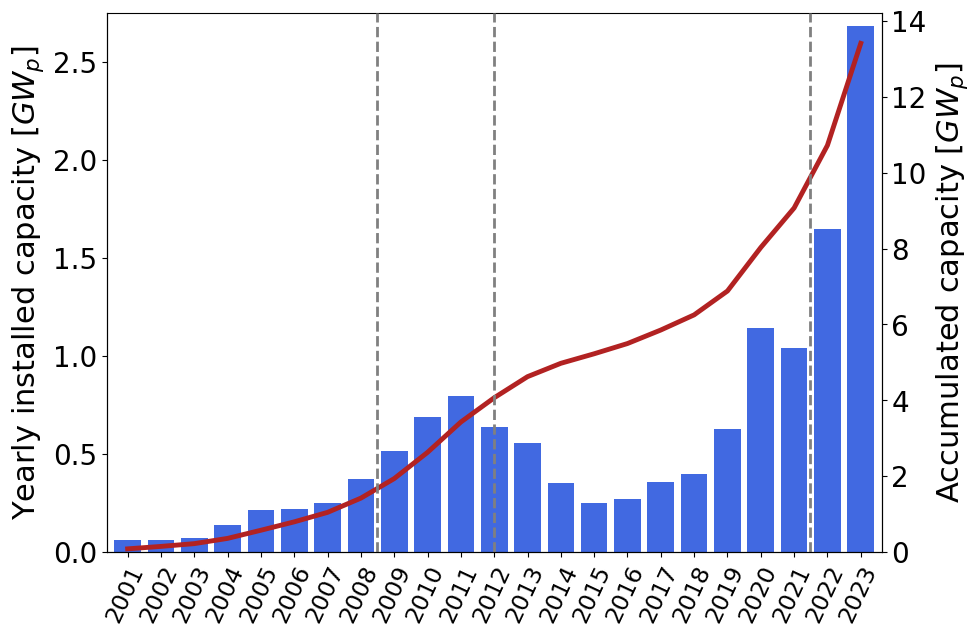

In [2]:
df_timeseries_pv_stock = pd.read_csv("data/Data_Timeseries_PV_Stock.csv", sep=";")
fig, ax1, ax2 = plot_pv_stock(
    df_timeseries_pv_stock,
    col_year="Year",
    col_installations="Yearly installed capacity [GWp]",
    col_stock="Accumulated capacity [GWp]",
)
plt.show()

## SHAP analysis of reduced GBT models for all four time periods

In [3]:
split_id_best_model = 4
feature_count_threshold = 15

timespan_dict = {
    "a": (1991, 2008),
    "b": (2009, 2012),
    "c": (2012, 2021),
    "d": (2022, 2023),
}

timespan_str_dict = {
    "a": "1991-2008",
    "b": "2009-2012",
    "c": "2012-2021",
    "d": "2022-2023",
}

In [4]:
rename_tick_dict = {
    "employees with academic qualification": "employees with academic\n qualification",
    "completed buildings with renewable heat energy systems": "completed buildings with\n renewable heat energy systems",
    "completed flats with renewable heat energy systems": "completed flats with\n renewable heat energy systems",
    "completed (semi-)detached houses (per capita)": "completed (semi-) detached\n houses (per capita)",
    "per capita permissions for (semi-)detached houses ": "per capita permissions\n for (semi-)detached houses",
    "density of residents and employees": "density of residents\n and employees",
    "employees with academic qualification": "employees with\n academic qualification",
    "GVA per employee in secondary sector": "GVA per employee\n in secondary sector",
    "German university entrance qualification (Abitur)": "Germany university entrance\n qualification (Abitur)",
    "employees in knowledge-intensive industries": "employees in\n knowledge-intensive industries",
    "median income (professional qualification)": "mean income\n (professional qualification)",
    "Certificates of Secondary Education (males)": "Certificates of Secondary Education\n(males)",
    "completed (semi-) detached houses (per capita)": "completed (semi-) detached\nhouses (per capita)",
}

#### SHAP feature importances (SI figures 1-4)

++++ time period 1991 - 2008 ++++


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightG

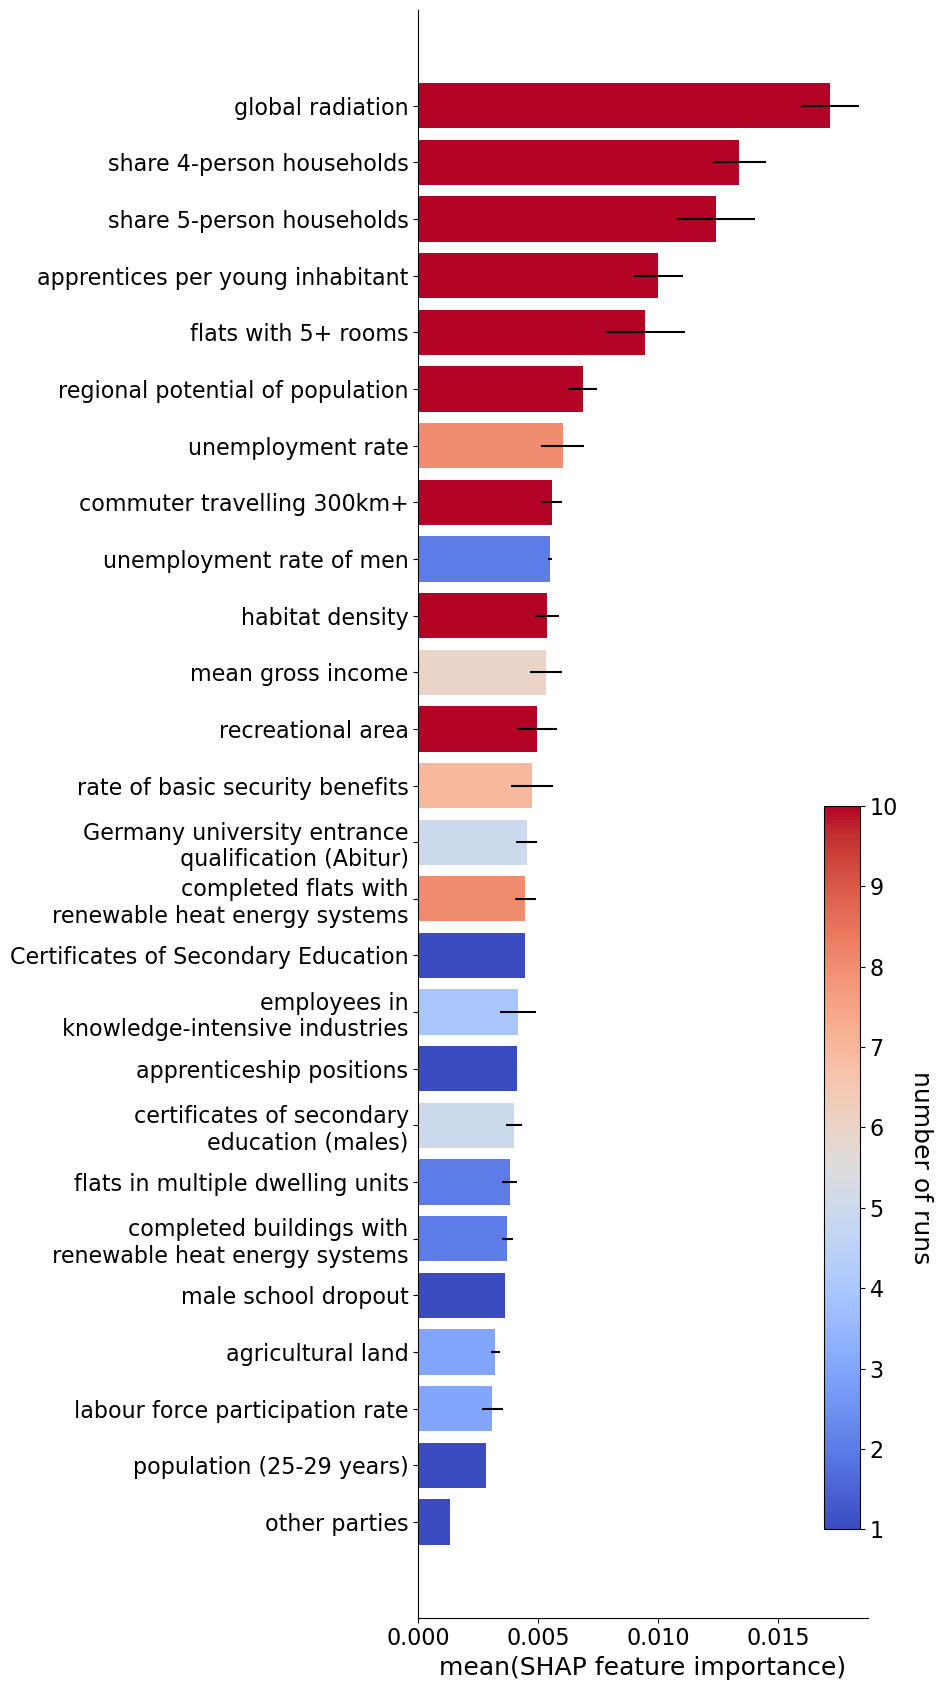

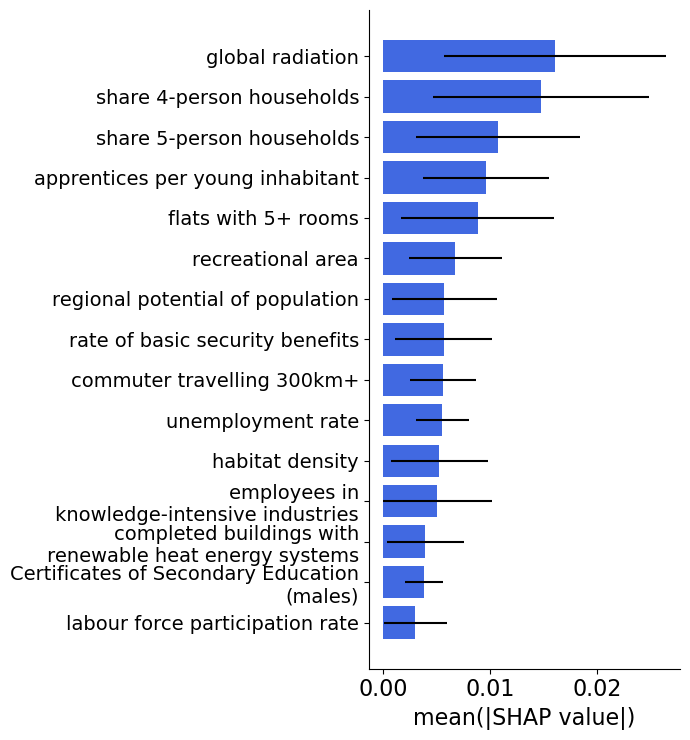

++++ time period 2009 - 2012 ++++


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightG

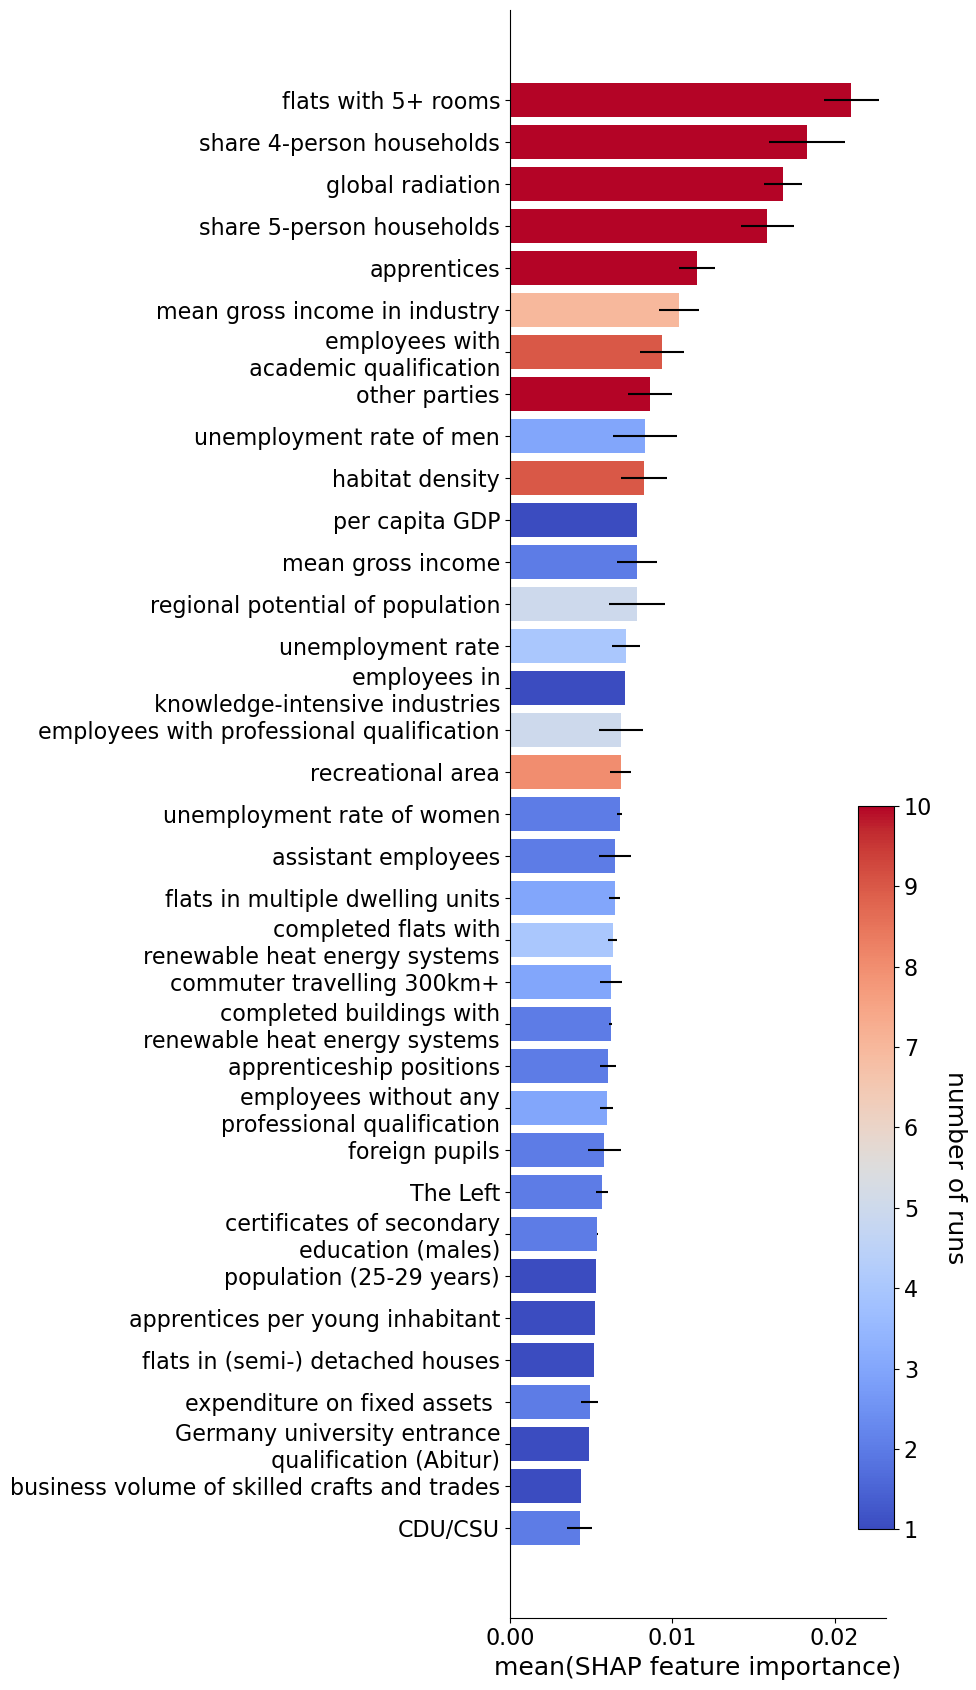

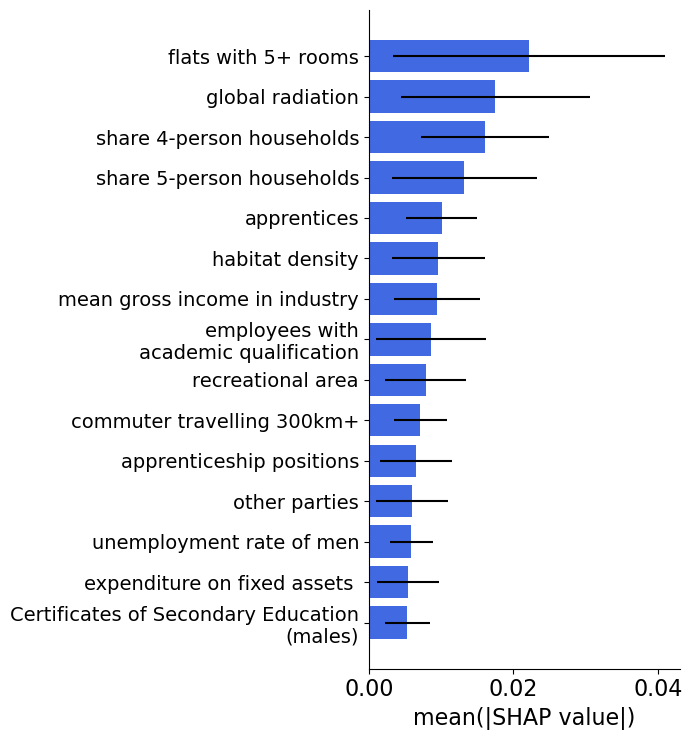

++++ time period 2012 - 2021 ++++


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightG

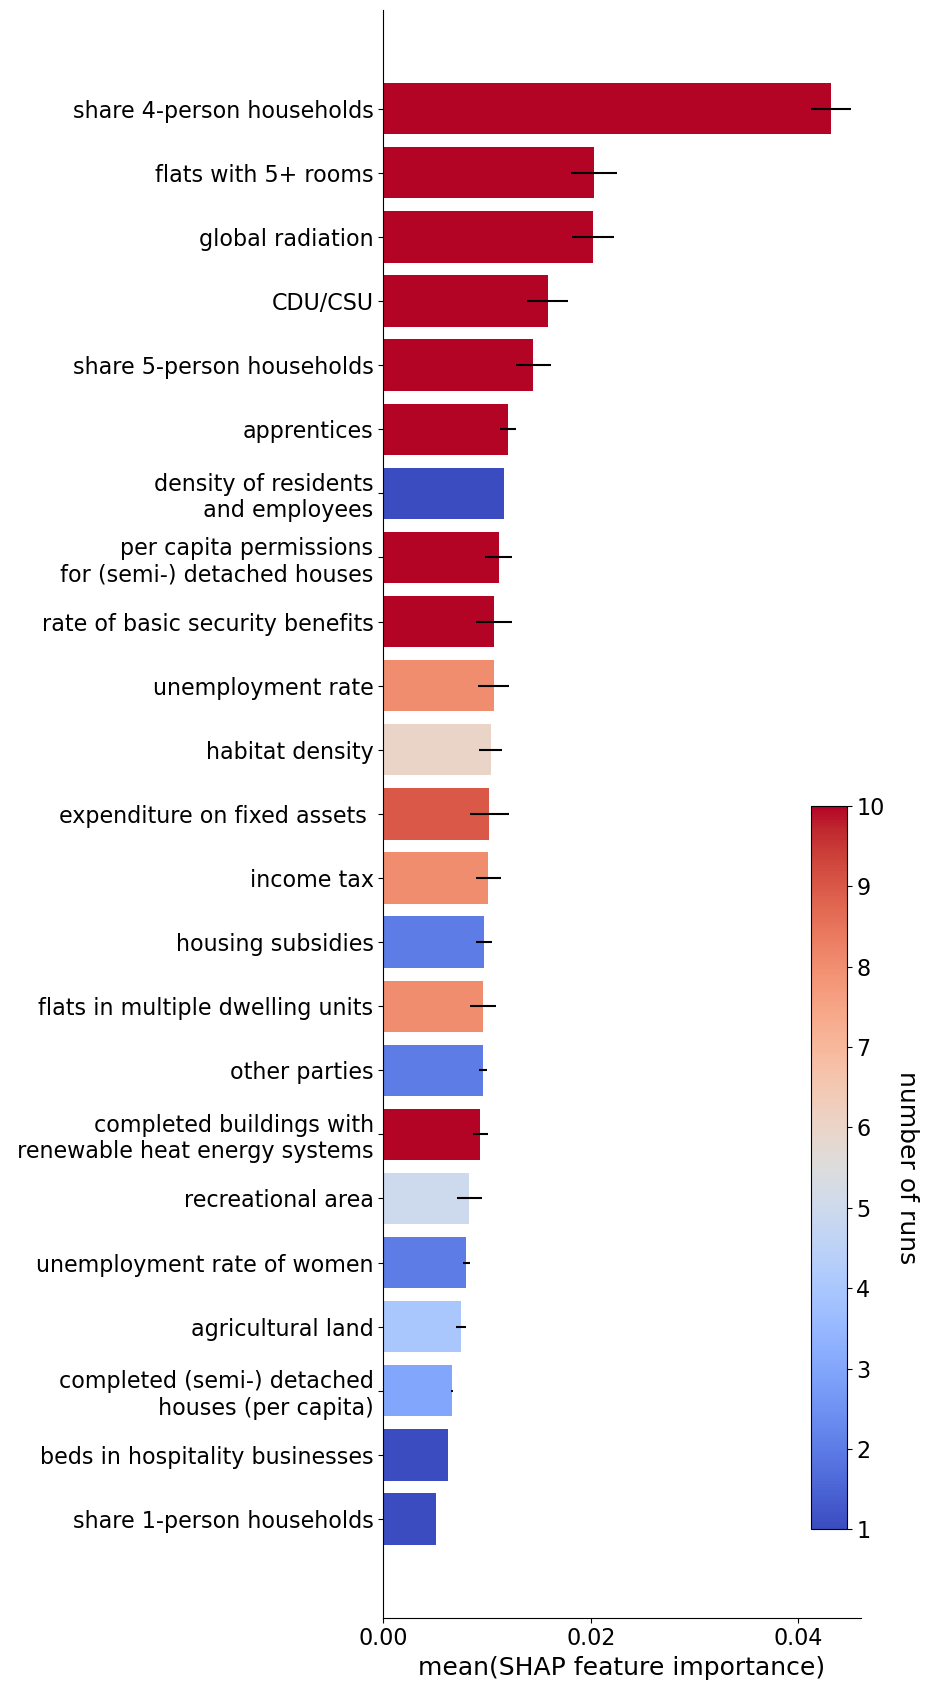

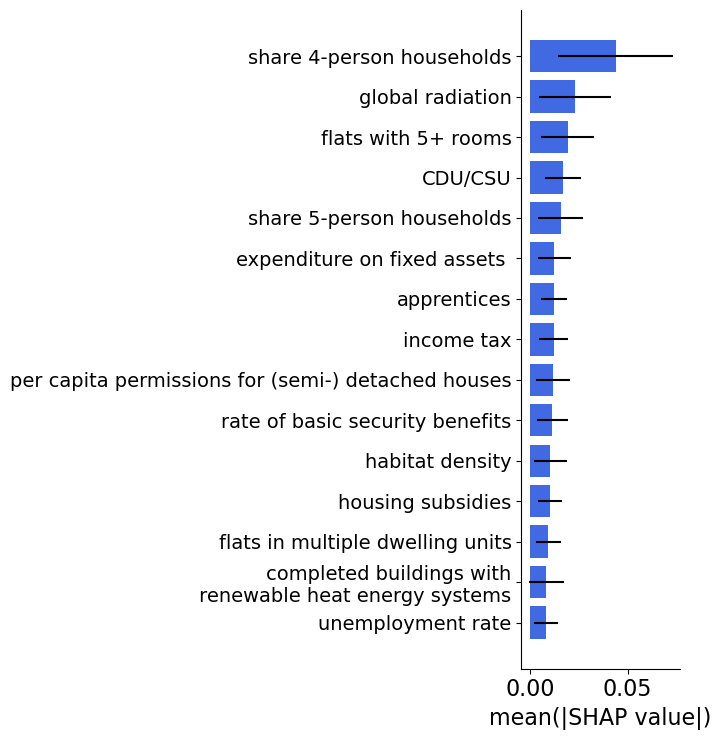

++++ time period 2022 - 2023 ++++


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightG

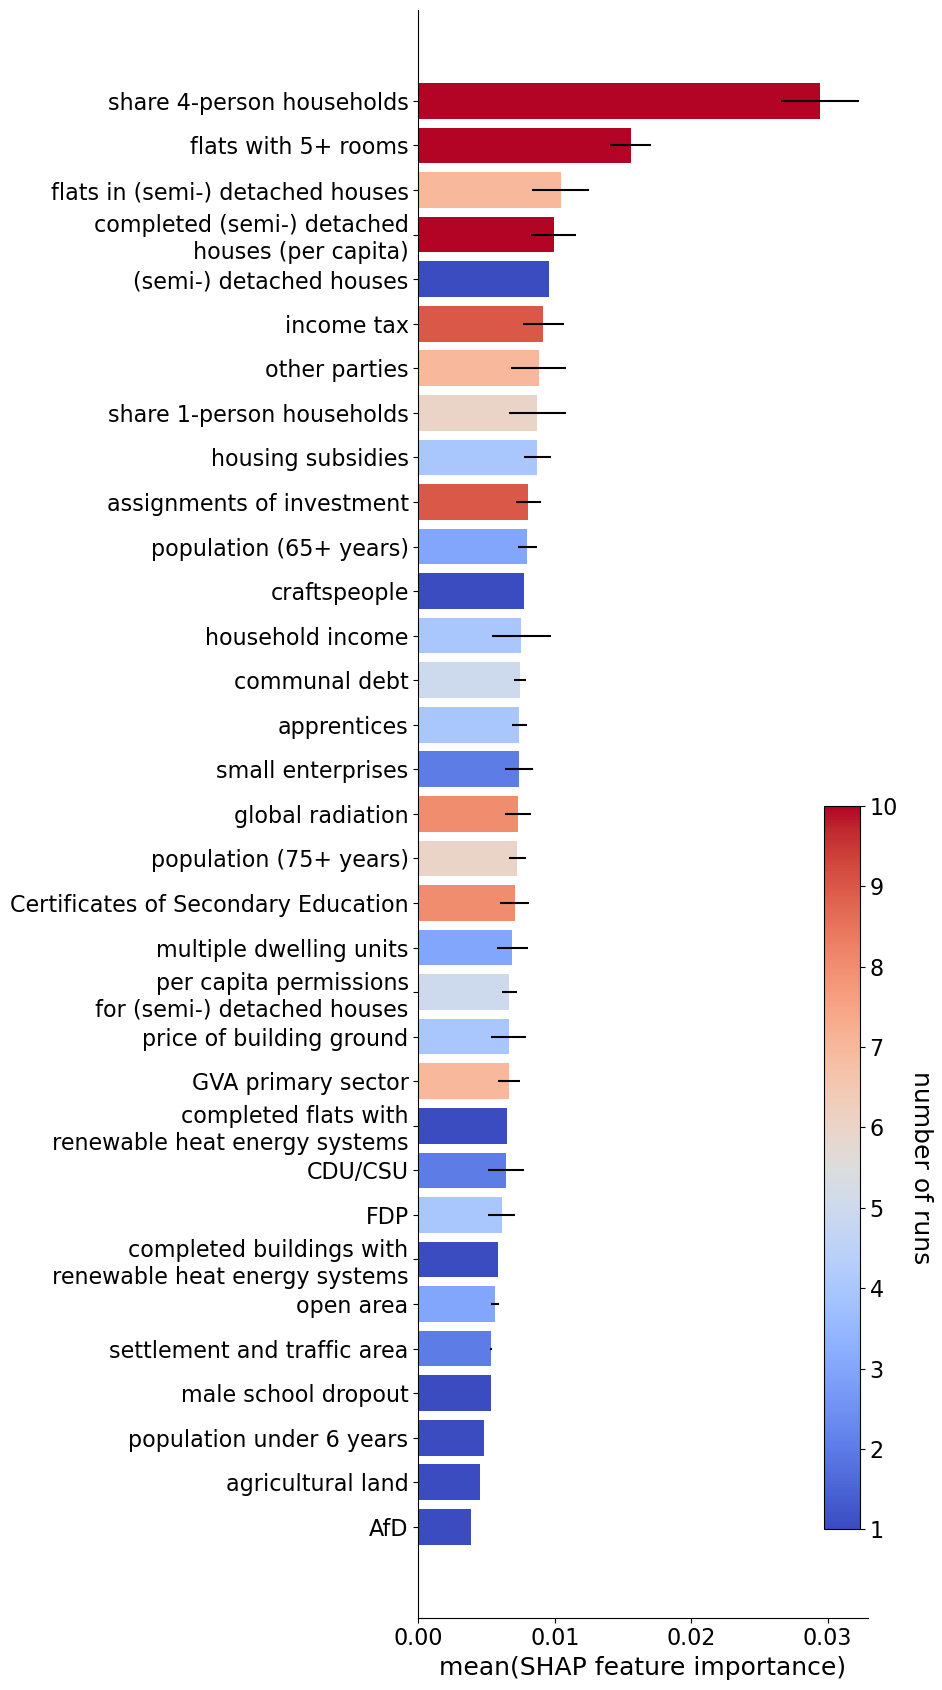

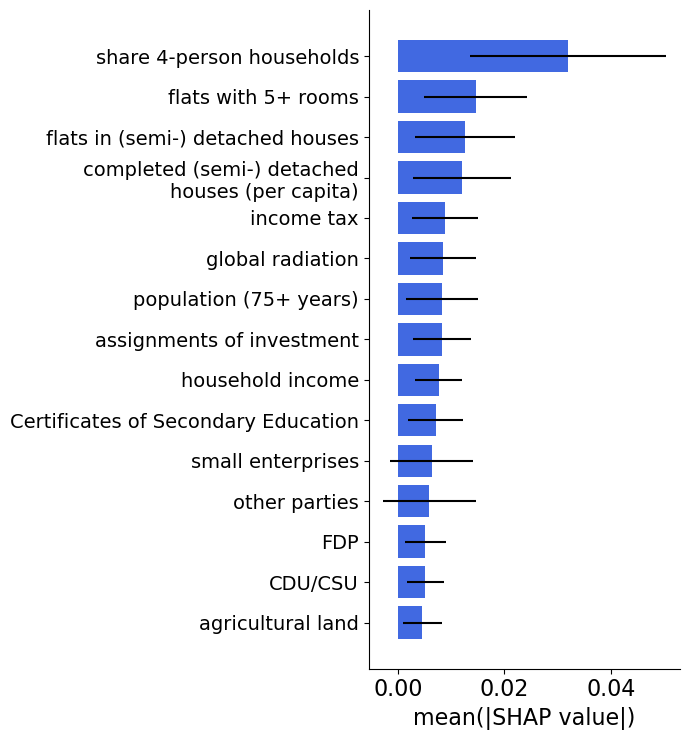

In [5]:
df_top_features = pd.DataFrame()
n_to_plot = 3

for timeperiod in timespan_dict:
    print(
        f"++++ time period {timespan_dict[timeperiod][0]} - {timespan_dict[timeperiod][1]} ++++"
    )
    df_performances = pd.read_csv(f"data/output/{timeperiod}_results_rfe.csv", sep=";")
    df_performances = prepare_performance_dataframe(df_performances, "features")

    df_metadata = pd.read_csv(f"data/output/{timeperiod}_metadata_rfe.csv", sep=";")
    df_metadata = prepare_metadata_dataframe(
        df_metadata, ["indices_training_set", "indices_val_set", "indices_test_set"]
    )

    df_data = pd.read_csv(df_metadata[col_file_path].unique()[0], sep=";")

    X_red_model = df_data[
        df_performances.loc[
            (df_performances[col_run_id] == split_id_best_model)
            & (df_performances[col_feature_count] == feature_count_threshold)
            & (df_performances[ranking_mean_r2_desc] == 1),
            col_features,
        ].values[0]
    ]
    model_dict = get_fitted_models(
        df_perf=df_performances,
        df_metadata=df_metadata,
        feat_count_red_model=feature_count_threshold,
        target_feat=col_power_accum_pv,
        train_on_train_val=True,
    )

    # get and plot mean SHAP feature importances
    df_mean_shap = get_mean_shap(
        model_dict,
        feature_count_threshold=feature_count_threshold,
        df_perf=df_performances,
        df_metadata=df_metadata,
    )
    features = list(df_mean_shap.index)
    features.remove(mean_r2_cv_test)

    fig, ax = bar_shap_feature_imp(df_run_eval_input=df_mean_shap, features=features)
    plt.show()

    # SHAP feature importances of best performing model
    tree_explainer = shap.explainers.Tree(model_dict[split_id_best_model])
    shap_values_timespan = tree_explainer.shap_values(X_red_model)
    fig, ax = bar_mean_shap(
        X=X_red_model,
        shap_values=shap_values_timespan,
        show_std=True,
        rename_features_dict=rename_tick_dict,
    )
    plt.grid(False)
    plt.show()

    # save three most important features
    mean_abs_shap = np.abs(shap_values_timespan).mean(axis=0)
    sorted_idx_shap = np.argsort(mean_abs_shap)
    mean_abs_shap = mean_abs_shap[sorted_idx_shap]
    std_abs_shap = np.abs(shap_values_timespan).std(axis=0)[sorted_idx_shap]
    relevant_features_sorted = X_red_model.columns[sorted_idx_shap]
    df_timespan = pd.DataFrame(
        {timeperiod: mean_abs_shap[-n_to_plot:][::-1]},
        index=relevant_features_sorted[-n_to_plot:][::-1],
    )
    df_top_features = pd.concat([df_top_features, df_timespan], axis=0)

#### Top-ranking features for all time periods (Figure 7b)

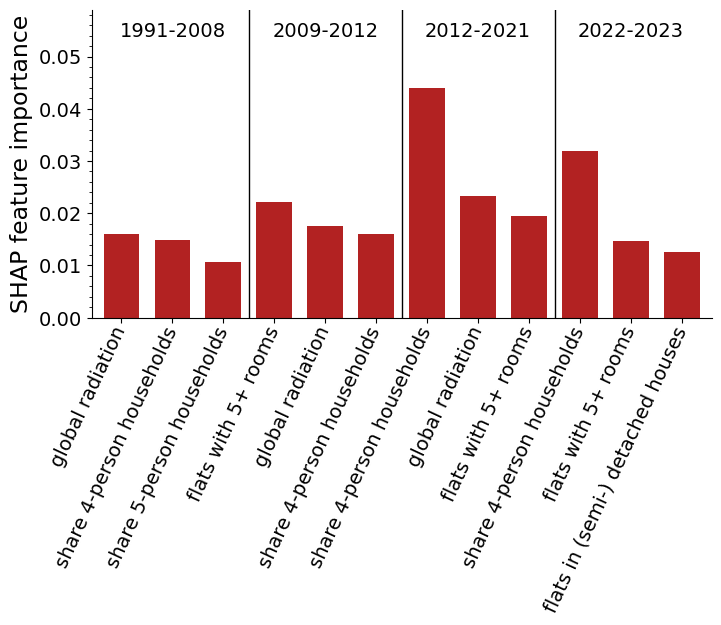

In [6]:
fig, ax = plot_shap_over_time(df_top_features, n_to_plot, timespan_str_dict)
plt.show()